In [ ]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=682b0c0328971a9883765590ba8b73293a6f1e5fff9abd87c85630b38d9e555d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/*.mp4')

# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Face2Face_Fake_Face_data/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceSwap_Fake_Face_data/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/NeuralTextures_Fake_Face_data/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Celeb_DF/FAKE/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/DFDC_DATASET/FAKE/*.mp4')

video_fil += glob.glob('/content/drive/MyDrive/Datasets/Real_Face_Dataset/youtube_Real_Face_data/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/Celeb_DF/REAL/*.mp4')
# video_fil += glob.glob('/content/drive/MyDrive/Datasets/DFDC_DATASET/REAL/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 1999
['/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/599_585.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/481_469.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/469_481.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/183_253.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/253_183.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/672_720.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/720_672.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/866_878.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/339_392.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/878_866.mp4', '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_da

In [ ]:
# corrupted = [
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/910_911.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/193_030.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/608_675.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/645_688.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/365_307.mp4',

#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Face2Face_Fake_Face_data/235_194.mp4',

#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/683_607.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/529_633.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/812_821.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/031_163.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/030_193.mp4',

#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceSwap_Fake_Face_data/340_341.mp4',

#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/NeuralTextures_Fake_Face_data/741_731.mp4',
#     '/content/drive/MyDrive/Datasets/Fake_Face_Dataset/NeuralTextures_Fake_Face_data/610_692.mp4',

#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/actors_real_Face_data/17__hugging_happy.mp4',
#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/actors_real_Face_data/05__walk_down_hall_angry.mp4',
#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/actors_real_Face_data/17__walking_down_street_outside_angry.mp4',

#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/youtube_Real_Face_data/481.mp4',
#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/youtube_Real_Face_data/548.mp4',
#     '/content/drive/MyDrive/Datasets/Real_Face_Dataset/youtube_Real_Face_data/108.mp4'
# ]

# for i in corrupted:
#     os.remove(i)

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Deepfakes_Fake_Face_data/*.mp4')

# video_files += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/Face2Face_Fake_Face_data/*.mp4')
# video_files += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceShifter_Fake_Face_data/*.mp4')
# video_files += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/FaceSwap_Fake_Face_data/*.mp4')
# video_files += glob.glob('/content/drive/MyDrive/Datasets/Fake_Face_Dataset/NeuralTextures_Fake_Face_data/*.mp4')

# video_files += glob.glob('/content/drive/MyDrive/Datasets/Celeb_DF/FAKE/*.mp4')
# video_files += glob.glob('/content/drive/MyDrive/Datasets/Celeb_DF/REAL/*.mp4')

# video_files += glob.glob('/content/drive/MyDrive/Datasets/Real_Face_Dataset/actors_real_Face_data/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Datasets/Real_Face_Dataset/youtube_Real_Face_data/*.mp4')

# video_files += glob.glob('/content/drive/MyDrive/Datasets/DFDC_DATASET/REAL/*.mp4')
# video_files += glob.glob('/content/drive/MyDrive/Datasets/DFDC_DATASET/FAKE/*.mp4')


random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 145, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["filename"] == temp_video].index.values[0]),1]
        if(label == 'fake'):
          label = 0
        if(label == 'real'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["filename","label"]
  lab = pd.read_csv('/content/drive/MyDrive/DatasetsLabels/all_video_labels.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
      temp_video = os.path.basename(i)
      if temp_video in labels["filename"].values:
          label = labels.loc[labels["filename"] == temp_video, "label"].values[0]
          if label == 'fake':
              fake += 1
          elif label == 'real':
              real += 1
      else:
          print(f"Warning: {temp_video} not found in labels")
  return real, fake

train :  1592
test :  398
TRAIN:  Real: 808  Fake: 784


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TEST:  Real: 189  Fake: 209


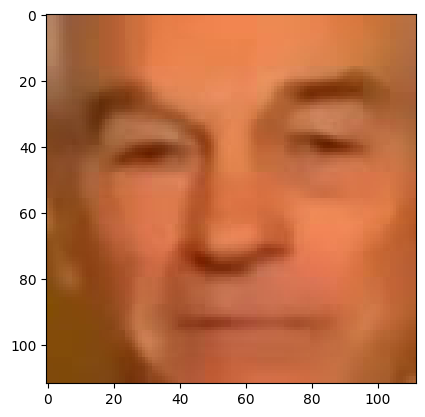

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["filename","label"]
labels = pd.read_csv('/content/drive/MyDrive/DatasetsLabels/all_video_labels.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 40,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 40,transform = train_transforms)
train_loader1 = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader1 = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:


model = Model(2).cuda()

a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        # parameters clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/drive/MyDrive/Model/checkpoint4.pt')
    return losses.avg,accuracies.avg

def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))

            # if torch.isnan(loss).any():
            #     print("NaNs in validation loss at batch", i)
            #     continue

            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

#### Gradual Warmup Scheduler


In [ ]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

# Warm-Up Scheduler Implementation
class GradualWarmupScheduler(optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, multiplier, total_iters, after_scheduler=None):
        self.multiplier = multiplier
        self.total_iters = total_iters
        self.after_scheduler = after_scheduler
        self.finished = False
        super(GradualWarmupScheduler, self).__init__(optimizer)

    def get_lr(self):
        if self.last_epoch > self.total_iters:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_last_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]

        return [base_lr * ((self.multiplier - 1) * self.last_epoch / self.total_iters + 1) for base_lr in self.base_lrs]

    def step(self, epoch=None):
        if self.finished and self.after_scheduler:
            if epoch is None:
                self.after_scheduler.step(None)
            else:
                self.after_scheduler.step(epoch - self.total_iters)
        else:
            return super(GradualWarmupScheduler, self).step(epoch)

### Training


[Epoch 1/20] [Batch 397 / 398] [Loss: 0.601519, Acc: 70.10%]Testing
[Batch 99 / 100]  [Loss: 0.275636, Acc: 88.69%]
Accuracy 88.69346733668341
[Epoch 2/20] [Batch 397 / 398] [Loss: 0.467703, Acc: 85.87%]Testing
[Batch 99 / 100]  [Loss: 0.165046, Acc: 94.22%]
Accuracy 94.22110552763819
[Epoch 3/20] [Batch 397 / 398] [Loss: 0.498967, Acc: 87.12%]Testing
[Batch 99 / 100]  [Loss: 0.155543, Acc: 93.97%]
Accuracy 93.96984924623115
[Epoch 4/20] [Batch 397 / 398] [Loss: 0.494854, Acc: 87.44%]Testing
[Batch 99 / 100]  [Loss: 0.180344, Acc: 94.97%]
Accuracy 94.9748743718593
[Epoch 5/20] [Batch 397 / 398] [Loss: 0.428074, Acc: 90.70%]Testing
[Batch 99 / 100]  [Loss: 0.154447, Acc: 94.72%]
Accuracy 94.72361809045226
[Epoch 6/20] [Batch 397 / 398] [Loss: 0.422888, Acc: 92.40%]Testing
[Batch 99 / 100]  [Loss: 0.159886, Acc: 95.23%]
Accuracy 95.22613065326634
[Epoch 7/20] [Batch 397 / 398] [Loss: 0.415785, Acc: 92.21%]Testing
[Batch 99 / 100]  [Loss: 0.205939, Acc: 95.23%]
Accuracy 95.22613065326634


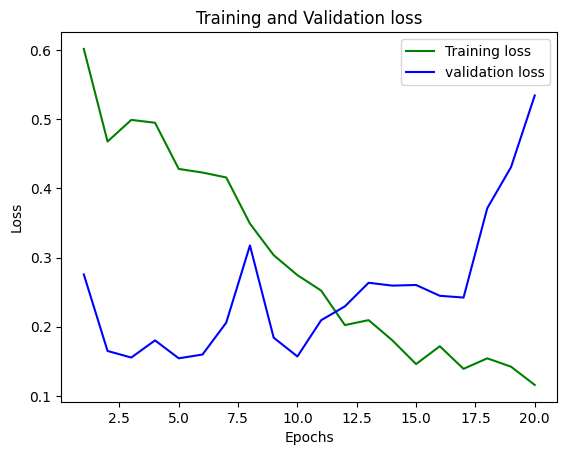

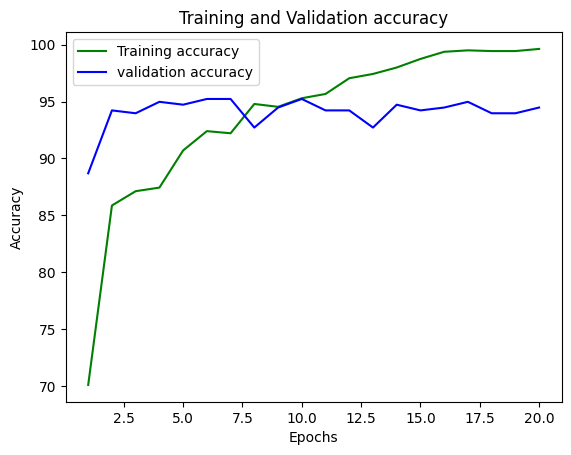

[[208   1]
 [ 21 168]]
True positive =  208
False positive =  1
False negative =  21
True negative =  168




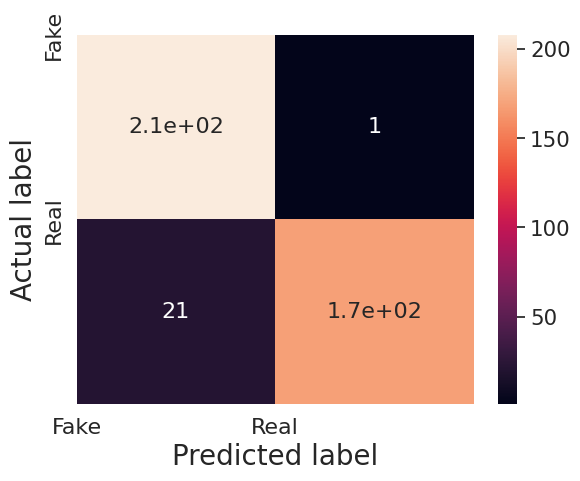

Calculated Accuracy 94.47236180904522


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

# Learning rate scheduler
base_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
warmup_scheduler = GradualWarmupScheduler(optimizer, multiplier=1, total_iters=5, after_scheduler=base_scheduler)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader1,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader1,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)